# **BASE DE DADOS  -  ESTIMATIVA DE QUANTITATIVO DE MULHERES EDITORAS E PRATICAS DE EDIÇÃO NA WIKIPÉDIA ESPANHOLA**

**Escola Politécnica de Pernambuco ‐  POLI / UPE Pós-Graduação lato sensu** 

**Especialização em Ciência de Dados e Analytics** 

**Disciplina:** Aprendizagem Supervisionada



In [ ]:
#@title IMPORTAÇÃO BIBLIOTECAS E MODULOS
#1. Definicao das bibliotecas
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')





# **1- Leitura dos Dados:**

In [ ]:

dataframe = pandas.read_csv('/content/data.csv',sep=',')
dataframe

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,1,male,3,2,2,20120227100614,20170930073013,266,2043,155,...,0,0,0,6,0,2,3,250,0.915024,978
4742,0,unknown,3,3,1,20111108054659,20170906055641,1217,2130,381,...,7,0,0,21,4,15,41,910,0.661673,477
4743,2,unknown,2,1,2,20120405102902,20170302073010,122,1793,33,...,7,0,0,8,1,0,2,111,1.027717,841
4744,2,female,3,3,2,20091014131349,20161112122730,962,2587,307,...,5,0,0,49,273,33,106,493,1.005227,817


# **2-Análise Exploratória dos dados:**

In [ ]:
#4. A analise exploratoria dos dados realizada em outro script
dataframe['gender']=dataframe['gender'].astype(float)
dataframe['C_api']=dataframe['C_api'].replace({'unknown':0,'male':1,'female':2})

In [ ]:
dataframe.head()

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1.0,1,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0.0,0,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1.0,1,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1.0,1,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0.0,0,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994


# **3 - EXPERIMENTO: APLICANDO OS MÉTODOS**


## **Método K-NN**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
plt.rcParams['figure.figsize'] = [16, 10]

In [ ]:
#divisao de dados atributos e classe
X = dataframe.values[:, 0:dataframe.shape[1]-1] #caracteristicas
Y = dataframe.values[:, dataframe.shape[1]-1] #classe

X

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        7.60000000e+01, 3.24000000e+02, 9.15024129e-01],
       [0.00000000e+00, 0.00000000e+00, 3.00000000e+00, ...,
        6.46000000e+02, 1.52600000e+03, 6.61673180e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.00000000e+00, 4.90000000e+01, 8.00528377e-01],
       ...,
       [2.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        2.00000000e+00, 1.11000000e+02, 1.02771710e+00],
       [2.00000000e+00, 2.00000000e+00, 3.00000000e+00, ...,
        1.06000000e+02, 4.93000000e+02, 1.00522695e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+01, 4.00000000e+01, 1.20440316e+00]])

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[5.00000000e-01, 5.00000000e-01, 0.00000000e+00, ...,
        6.15384615e-03, 2.80405376e-03, 3.46201675e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.23076923e-02, 1.32067470e-02, 1.71840376e-01],
       [5.00000000e-01, 5.00000000e-01, 0.00000000e+00, ...,
        2.42914980e-04, 4.24069859e-04, 2.67403360e-01],
       ...,
       [1.00000000e+00, 0.00000000e+00, 5.00000000e-01, ...,
        1.61943320e-04, 9.60648048e-04, 4.23759277e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        8.58299595e-03, 4.26666205e-03, 4.08281095e-01],
       [5.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.61943320e-03, 3.46179477e-04, 5.45358237e-01]])

In [ ]:
#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

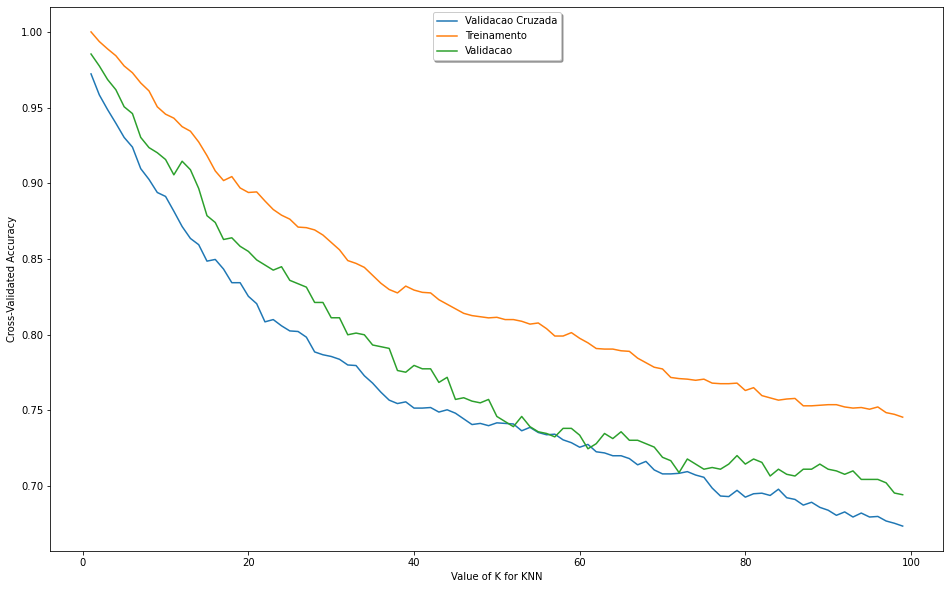

In [ ]:
k_range = range(1, 100) #k
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for j in k_range:
  knn = neighbors.KNeighborsClassifier(n_neighbors=j)
  scores = cross_val_score(knn, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
  k_scores_train.append(scores.mean())
  knn.fit(X_train_cv, y_train_cv)
  k_scores_train_full.append(knn.score(X_train_cv, y_train_cv))
  k_scores_valid.append(knn.score(X_valid, y_valid))

# plot to see clearly
plt.plot(list(range(1,len(k_scores_train)+1)), k_scores_train)
plt.plot(list(range(1,len(k_scores_train_full)+1)), k_scores_train_full)
plt.plot(list(range(1,len(k_scores_valid)+1)), k_scores_valid)
plt.legend(('Validacao Cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn import neighbors
   

print("Primeiros dados")
print(dataframe.head(5))

#divisao de dados atributos e classe
X = dataframe.values[:, 0:20]
Y = dataframe.values[:,20]

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(7)

clf = clf.fit(X_train, y_train)

print("Acuracia de trainamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))
       


Primeiros dados
   gender  C_api  C_man  E_NEds  E_Bpag        firstDay         lastDay  NEds  \
0     1.0      1      1       2       2  20170527205915  20170721044501   543   
1     0.0      0      3       3       1  20110301072441  20170731213735  2764   
2     1.0      1      1       0       2  20060907204302  20140911191722    57   
3     1.0      1      1       1       2  20121003144916  20121208180528   104   
4     0.0      0      3       1       1  20070311125035  20141106121057   184   

   NDays  NActDays  ...  NPcreated  pagesWomen  wikiprojWomen  ns_user  \
0     56        43  ...          4           0              0       91   
1   2345       514  ...          7           0              0      100   
2   2927        25  ...          0           0              0        3   
3     67         5  ...          2           0              0       20   
4   2798        27  ...          0           0              0       26   

   ns_wikipedia  ns_talk  ns_userTalk  ns_content  w

## **Método LVQ**

In [ ]:
pip install neupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 226 kB 8.5 MB/s 
     |████████████████████████████████| 92.7 MB 44 kB/s 
     |████████████████████████████████| 3.2 MB 38.4 MB/s 
     |████████████████████████████████| 50 kB 7.6 MB/s 
     |████████████████████████████████| 367 kB 45.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220929150707
    Uninstalling tensorflow-2.8.2+zzzcolab20220929150707:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab2022092915070

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from neupy import algorithms
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = [16, 10]

In [ ]:
# we create an instance of Neighbours Classifier and fit the data.
p_range = range(7, 20)
p_scores_train = []
p_scores_train_full = []
p_scores_valid = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for p in p_range:
    lvqnet = algorithms.LVQ(n_inputs=16, n_classes=7, n_subclasses=p)
    scores = cross_val_score(lvqnet, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
    p_scores_train.append(scores.mean())
    lvqnet.train(X_train_cv, y_train_cv, epochs=20)
    p_scores_train_full.append(accuracy_score(lvqnet.predict(X_train_cv), y_train_cv))
    p_scores_valid.append(accuracy_score(lvqnet.predict(X_valid), y_valid))

ValueError: ignored

ValueError: ignored

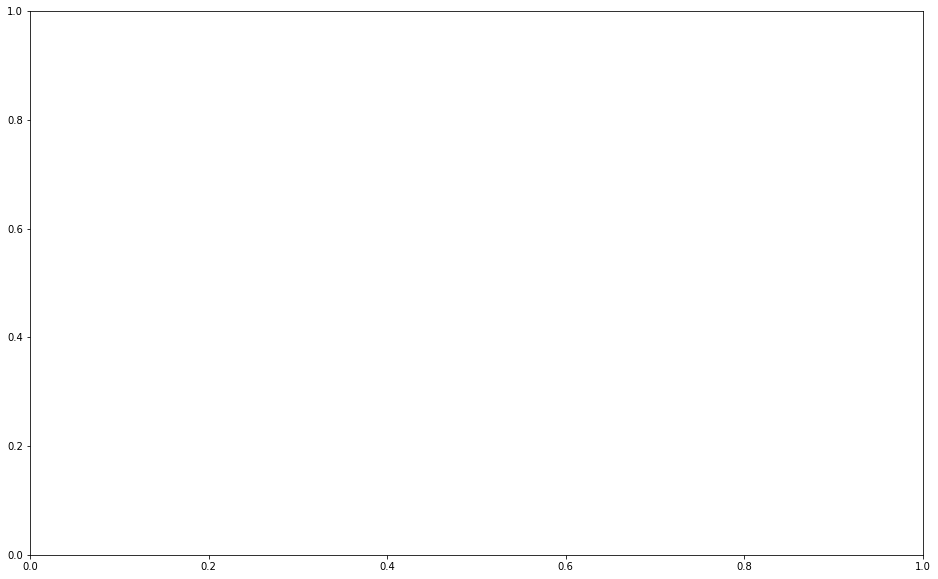

In [ ]:
# plot to see clearly
plt.plot(p_range, p_scores_train)
plt.plot(p_range, p_scores_train_full)
plt.plot(p_range, p_scores_valid)
plt.legend(('Validacao Cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Number of centroids for LVQ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
lvqnet = algorithms.LVQ(n_inputs=16, n_classes=7, n_subclasses=11)
lvqnet.train(X_train, y_train, epochs=20)

print("Acuracia de treinamento clf: %0.3f" %  accuracy_score(lvqnet.predict(X_train),y_train))
print("Acuracia de teste clf: %0.3f" %  accuracy_score(lvqnet.predict(X_test), y_test))

ValueError: ignored

## **Método Árvore de decisão simples**

In [ ]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 47 kB 5.8 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=eb872c143340f3ffae210f1bae54e5a1b7b540f414004eb0049970fc11377608
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.5.1
    Uninstalling graphviz-0.5.1:
      Successfully uninstalled graphviz-0.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neupy 0.8.2 requires graphviz==0.5.1, but you have graphviz 0.20.1 which is incompatible.


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
plt.rcParams['figure.figsize'] = [16, 10]

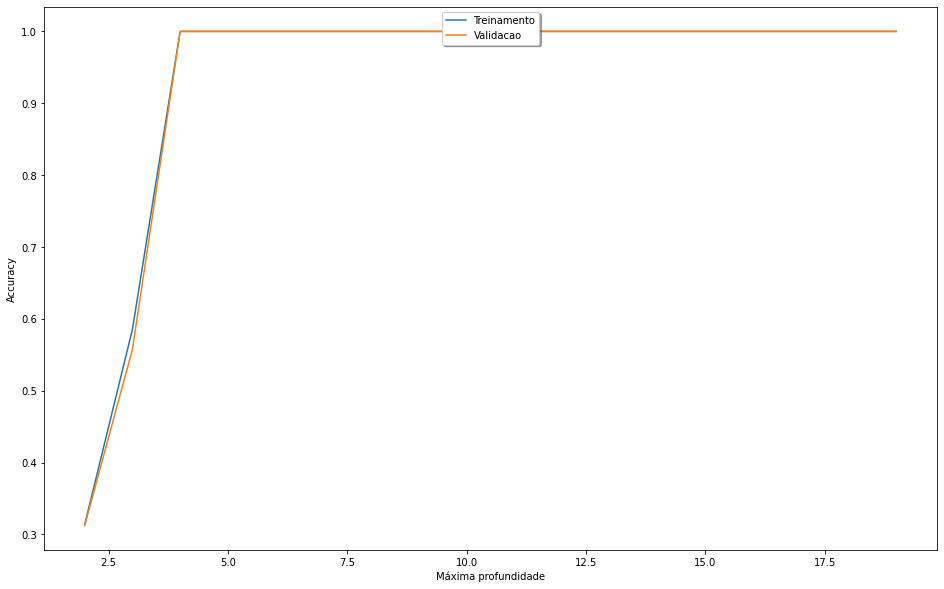

In [ ]:
#criando diferentes arvores
depth_range = range(2, 20)
train_score = []
valid_score = []

for d in depth_range:
    tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state = 10)
    tree1.fit(X_train_cv, y_train_cv)
    train_score.append(tree1.score(X_train_cv, y_train_cv))
    valid_score.append(tree1.score(X_valid, y_valid))

plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)
plt.legend(('Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Máxima profundidade')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
tree_final = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state = 10)
tree_final.fit(X_train_cv, y_train_cv)

print("Acuracia de treinamento da tree_final: %0.3f" %  tree_final.score(X_train, y_train))
print("Acuracia de validacao da tree_final: %0.3f" %  tree_final.score(X_test, y_test))


Acuracia de treinamento da tree_final: 1.000
Acuracia de validacao da tree_final: 1.000


|--- NEds <= 0.00
|   |--- NEds <= 0.00
|   |   |--- weightIJ <= 0.36
|   |   |   |--- weightIJ <= 0.13
|   |   |   |   |--- class: 297.0
|   |   |   |--- weightIJ >  0.13
|   |   |   |   |--- class: 664.0
|   |   |--- weightIJ >  0.36
|   |   |   |--- E_Bpag <= 0.17
|   |   |   |   |--- class: 1277.0
|   |   |   |--- E_Bpag >  0.17
|   |   |   |   |--- class: 1074.0
|   |--- NEds >  0.00
|   |   |--- E_Bpag <= 0.50
|   |   |   |--- E_Bpag <= 0.17
|   |   |   |   |--- class: 974.0
|   |   |   |--- E_Bpag >  0.17
|   |   |   |   |--- class: 994.0
|   |   |--- E_Bpag >  0.50
|   |   |   |--- weightIJ <= 0.27
|   |   |   |   |--- class: 493.0
|   |   |   |--- weightIJ >  0.27
|   |   |   |   |--- class: 841.0
|--- NEds >  0.00
|   |--- weightIJ <= 0.37
|   |   |--- weightIJ <= 0.30
|   |   |   |--- NEds <= 0.01
|   |   |   |   |--- class: 917.0
|   |   |   |--- NEds >  0.01
|   |   |   |   |--- class: 477.0
|   |   |--- weightIJ >  0.30
|   |   |   |--- E_NEds <= 0.83
|   |   |   |   |---

IndexError: ignored

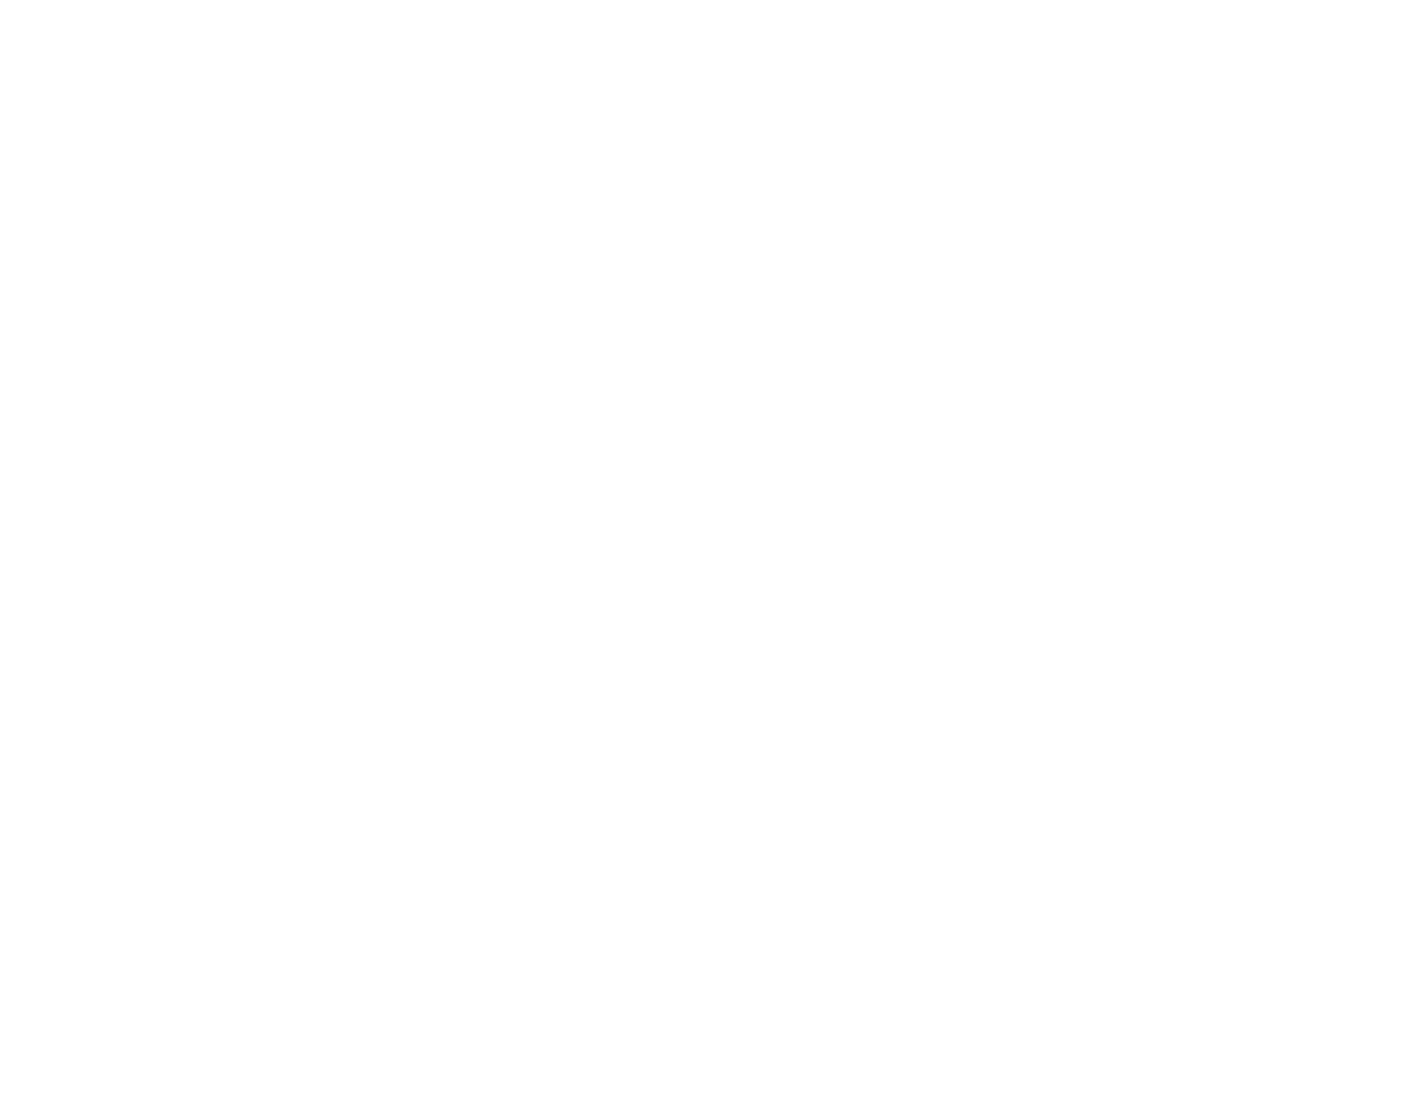

In [ ]:
dataframe= pandas.read_csv('/content/data.csv',sep=',')

feat_names = list(dataframe.columns)
class_names = dataframe['C_api'].unique().tolist()

#apresentacao da arvore em texto
text_representation = tree.export_text(tree_final, feature_names=feat_names[0:len(feat_names)-1])
print(text_representation)

#apresentacao usando o plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_final, 
                   feature_names=feat_names,  
                   class_names=class_names,
                   filled=True)
#para salvar a imagem
fig.savefig("decistion_tree.png")

#utilizando o graphiz
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree_final, out_file=None, 
                                feature_names=feat_names[0:len(feat_names)-1],  
                                class_names=class_names,
                                filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

from dtreeviz.trees import dtreeviz # remember to load the package
from sklearn.preprocessing import LabelEncoder
viz = dtreeviz(tree_final, X_train, LabelEncoder().fit_transform(y_train),
                target_name="target",
                feature_names=feat_names,
                class_names=class_names)

viz

## **Método SVM** 

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
plt.rcParams['figure.figsize'] = [16, 10]

In [ ]:
dataframe['gender']=dataframe['gender'].astype(float)
dataframe['C_api']=dataframe['C_api'].replace({'unknown':0,'male':1,'female':2})
dataframe.head(1)

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1.0,1,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978


In [ ]:
#divisao de dados atributos e classe
X = dataframe.values[:, 0:dataframe.shape[1]-1] #caracteristicas
Y = dataframe.values[:, dataframe.shape[1]-1] #classe

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.7, random_state = 10)

X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)



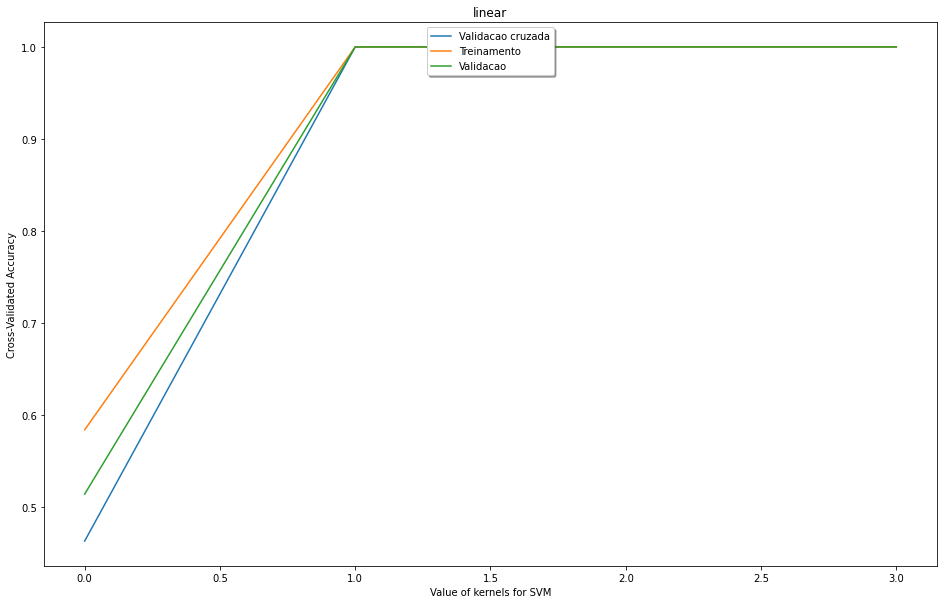

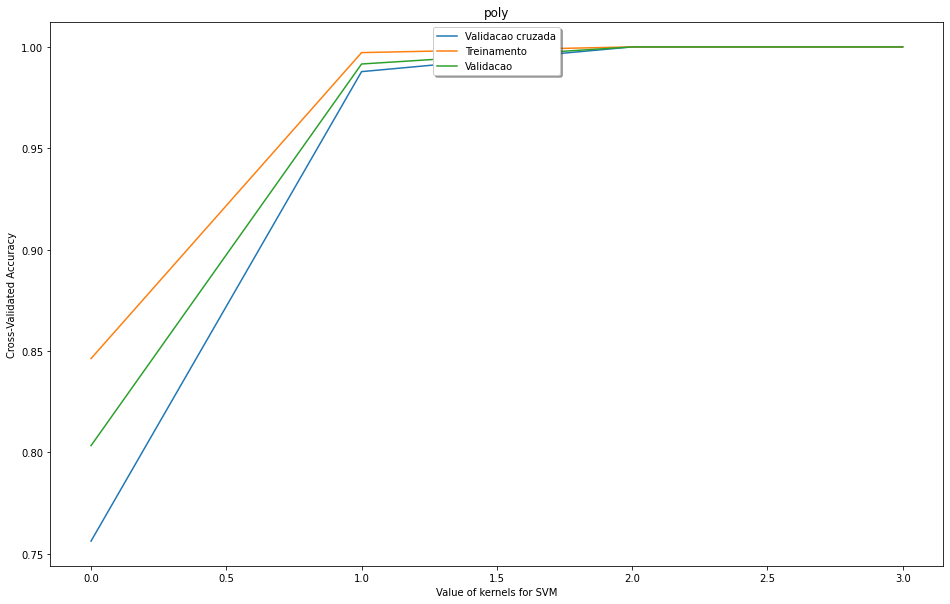

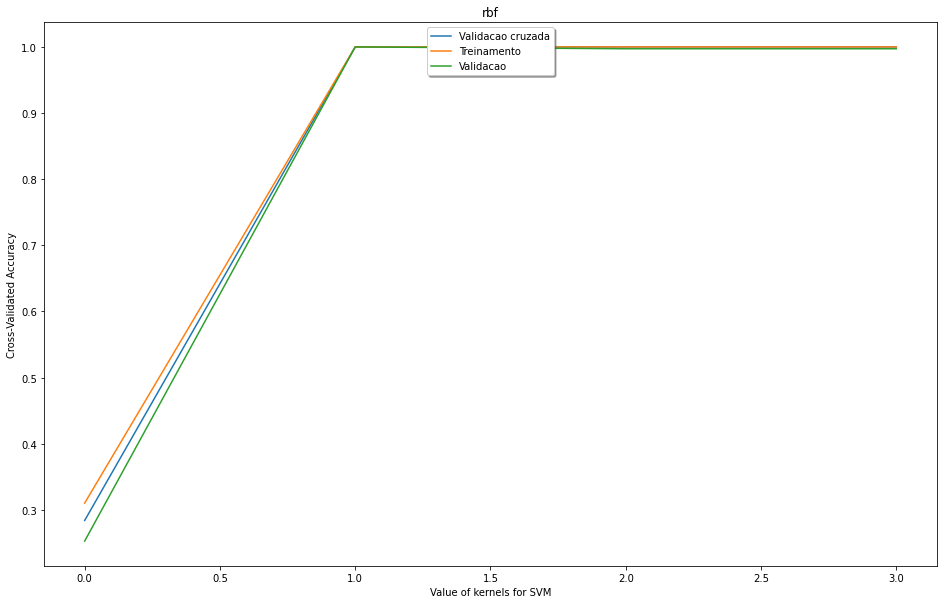

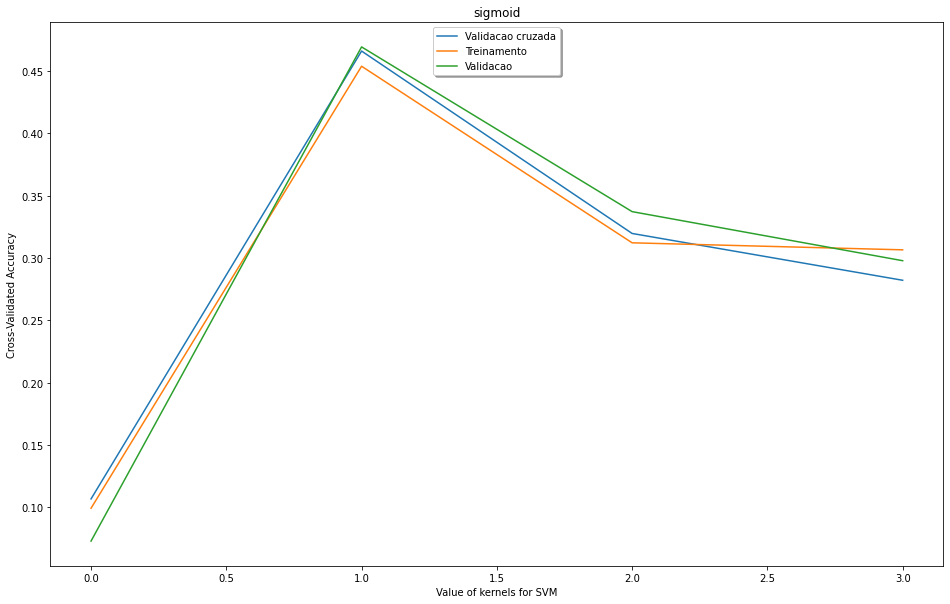

In [ ]:
kernels_range = ['linear', 'poly', 'rbf', 'sigmoid']
c_range =[0.1,1,10,100]


# use iteration to caclulator different kernels in models, then return the average accuracy based on the cross validation
for kernel in kernels_range:
    k_scores_train = []
    k_scores_valid = []
    k_scores_cross = []

    for c in c_range:
        svc = SVC(C=c, random_state=10, kernel=kernel)
        scores = cross_val_score(svc, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
        k_scores_cross.append(scores.mean())
        svc.fit(X_train_cv, y_train_cv)
        k_scores_train.append(svc.score(X_train_cv, y_train_cv))
        k_scores_valid.append(svc.score(X_valid, y_valid))

    # plot to see clearly
    plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
    plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
    plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
    plt.title(f'{kernel}')
    plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
              loc='upper center', shadow=True)
    plt.xlabel('Value of kernels for SVM')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [ ]:
clf = SVC(C=100, random_state=10, kernel='linear')
clf.fit(X_train, y_train)

print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))

Acuracia de treinamento clf: 1.000
Acuracia de teste clf: 1.000


## **Método Random Forest** 



In [ ]:
# Random Forest Classification
import pandas as pd
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

In [ ]:
dataframe = pandas.read_csv('/content/data.csv',sep=',')
dataframe['gender']=dataframe['gender'].astype(float)
dataframe['C_api']=dataframe['C_api'].replace({'unknown':0,'male':1,'female':2})
#divisao de dados atributos e classe
X = dataframe.values[:, 0:dataframe.shape[1]-1] #caracteristicas
Y = dataframe.values[:, dataframe.shape[1]-1] #classe

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.70, random_state=10)

X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

In [ ]:
num_trees_range = range(10, 101, 10)
max_features = 8

#numero de folds atraves do metodo k-fold
kfold = model_selection.StratifiedKFold(n_splits=10)

cross_scores = []
train_scores = []
valid_scores = []

for num_trees in num_trees_range:
    #criando o classificador Random Forest
    model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=10, max_depth=5)

    #treinamento do Random Forest em dez folds
    results = model_selection.cross_val_score(model_rf, X_train_cv, y_train_cv, cv=kfold)
    model_rf = model_rf.fit(X_train_cv, y_train_cv)
    cross_scores.append(results.mean())
    train_scores.append(model_rf.score(X_train_cv, y_train_cv))
    valid_scores.append(model_rf.score(X_valid, y_valid))


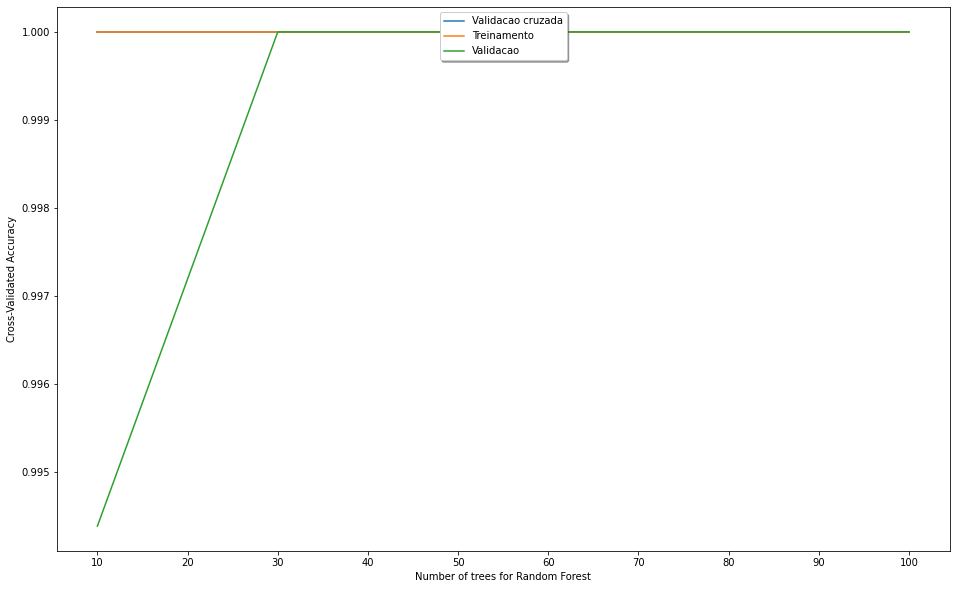

In [ ]:
# plot to see clearly
plt.plot(num_trees_range, cross_scores)
plt.plot(num_trees_range, train_scores)
plt.plot(num_trees_range, valid_scores)
plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
          loc='upper center', shadow=True)
plt.xticks(num_trees_range, num_trees_range)
plt.xlabel('Number of trees for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
model_rf_final = RandomForestClassifier(n_estimators=60, max_features=max_features, random_state=10)
model_rf_final = model_rf_final.fit(X_train, y_train)

print("Treinamento: ", model_rf_final.score(X_train, y_train))
print("Teste: ", model_rf_final.score(X_test,y_test))

Treinamento:  1.0
Teste:  1.0


## **Método Rede Neural** 

## **Método MLP** 

## **Método Comitê de Redes Neurais** 

## **Método Comitê heterogêneo** 

In [ ]:
# Voting Ensemble for Classification
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier
import warnings

In [ ]:
dataframe = pandas.read_csv('/content/data.csv',sep=',')
dataframe['gender']=dataframe['gender'].astype(float)
dataframe['C_api']=dataframe['C_api'].replace({'unknown':0,'male':1,'female':2})
#divisao de dados atributos e classe
X = dataframe.values[:, 0:dataframe.shape[1]-1] #caracteristicas
Y = dataframe.values[:, dataframe.shape[1]-1] #classe
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [ ]:
kfold = StratifiedKFold(n_splits=10)

# create the sub models
estimators = []
model1 = neighbors.KNeighborsClassifier(n_neighbors=20)
estimators.append(('knn', model1))

model2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state = 10)
estimators.append(('decision_tree', model2))

model3 = SVC(C=100, random_state=10, kernel='poly')
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train, y_train, cv=kfold)
print('cross validation score =', results.mean())

ensemble.fit(X_train, y_train)

print('test score =', ensemble.score(X_test, y_test))


cross validation score = 1.0
test score = 1.0


# **COMPARANDO OS ALGORITMOS**

Apresentando o shape dos dados (dimenssoes)
(4746, 21)
=========Random Search Results fro TREE==========
Best Score: 1.0
Best Hyperparameters: {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 17, 'criterion': 'gini'}
=========Random Search Results for SVM==========
Best Score: 0.08457429973097008
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'C': 10}

Desempenhos medios dos modelos:
Arvore: 1.000000 (0.000000)
SVM: 0.084574 (0.000838)
ComiteArvore: 0.999438 (0.001124)
RedeNeural: 0.056196 (0.000047)
ComiteRede: 0.053667 (0.000839)

Different distributions (reject H0)

Comparison stats 47.35871836901956
Comparacao Arvore | SVM -> KruskalResult(statistic=17.57631822386678, pvalue=2.760041810417523e-05)
Comparacao Arvore | ComiteArvore -> KruskalResult(statistic=2.1111111111111036, pvalue=0.14623310699120676)
Comparacao Arvore | RedeNeural -> KruskalResult(statistic=18.181818181818173, pvalue=2.0078656124264935e-05)
Comparacao Arvore | CRNA -> KruskalResult(statistic=17.

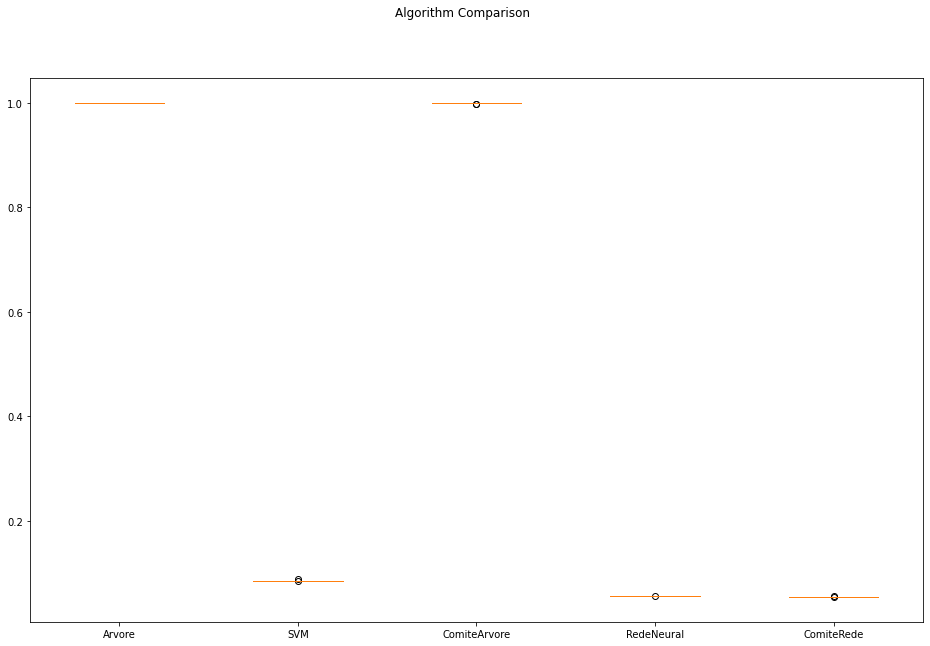

In [ ]:
# Compare Algorithms script

#1. Definicao das bibliotecas
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

#2. Definicao da semente para geracao de numereos aleatorios
#Intialise a random number generator
# Set a seed value
seed_value= 12321 
# 1. Set 'PYTHONHASHSEED' environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set 'python' built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

#3. Leitura dos dados
#names = ['gender','C_man','E_NEds','E_Bpag','NEds','NDays','NActDays','NPages','NPcreated','pagesWomen','wikiprojWomen','ns_user','ns_wikipedia','ns_talk','ns_userTalk','ns_content','weightIJ','NIJ']
#dataframe = pandas.read_csv("/content/base_excel - comp.csv", names=names)

#4. A analise exploratoria dos dados realizada em outro script

#5. Preparacao dos dados conduzida em outro script
print("Apresentando o shape dos dados (dimenssoes)")
print(dataframe.shape)
array = dataframe.values
X = array[:,0:20]
Y = array[:,20]

#6. Divisao da base de dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=seed_value)

#X_train_p, X_valid, y_train_p, y_valid = train_test_split(X_train, y_train, random_state=seed)

#7. Realizar busca com o gridsearch ou randonsearhc para encontrar os melhores parametros de cada modelo
# define models
decisionTree = DecisionTreeClassifier()
svc = SVC()

# define evaluation
cv = model_selection.StratifiedKFold(n_splits=10)

# define search space for decision tree
space = dict()
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [2,3,5,7]
space['max_depth'] = [3,5,6,7,9,11,13,15,17,19]
space['min_samples_leaf'] = [2, 3]

# defining parameter range for svm
param_grid = {'C': [0.1, 1, 10,],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

# define random search for decision tree
search = RandomizedSearchCV(decisionTree, space, n_iter=50, scoring='accuracy', n_jobs=4, cv=cv)

# execute search
result_tree = search.fit(X_train, y_train)

# summarize result for decision tree
print('=========Random Search Results fro TREE==========')
print('Best Score: %s' % result_tree.best_score_)
print('Best Hyperparameters: %s' % result_tree.best_params_)

# define random search for SVM
search = RandomizedSearchCV(svc, param_grid, n_iter=10, scoring='accuracy', n_jobs=4, cv=cv, random_state=seed_value)

# execute search
result_svc = search.fit(X_train, y_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)


#8. Definicao dos modelos de classificacao com as melhores configuracoes
# criacao dos modelos com os melhores parametros
RFC = RandomForestClassifier(n_estimators=10,random_state=seed_value)
svc = result_svc.best_estimator_
DTC = result_tree.best_estimator_   #tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=seed_value)
BMLP = BaggingClassifier(base_estimator=MLP, n_estimators=10, random_state=seed_value)

#adiciona os modelos em uma lista
models = []
models.append(('Arvore', DTC))
models.append(('SVM', svc))
models.append(('ComiteArvore', RFC))
models.append(('RedeNeural', MLP))
models.append(('ComiteRede', BMLP))
# evaluate each model in turn
results = []
names = []
#deficao da metrica a ser utilizada
scoring = 'accuracy'

#9. Definicao do modelo experimental
#amostragem estratificada
#kfold = cv

#10 Execucao do modelo experimental
#avaliacao de cada modelo nas amotragens estratificas
print('\nDesempenhos medios dos modelos:')
for name, model in models:
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

#11 Comparacao de modelos
# Teste de hipotese analisando o p-value
stat, p = stats.kruskal(results[0],results[1],results[2],results[3],results[4])
alpha = 0.05
if p > alpha:
	print('\nSame distributions (fail to reject H0)')
else:
	print('\nDifferent distributions (reject H0)')
 
print('\nComparison stats', stat)

print('Comparacao Arvore | SVM ->', stats.kruskal(results[0],results[1]))
print('Comparacao Arvore | ComiteArvore ->', stats.kruskal(results[0],results[2]))
print('Comparacao Arvore | RedeNeural ->',stats.kruskal(results[0],results[3]))
print('Comparacao Arvore | CRNA ->',stats.kruskal(results[0],results[4]))
print('Comparacao SVM | RedeNeural ->',stats.kruskal(results[2],results[3]))
print('Comparacao SVM | ComiteRede ->',stats.kruskal(results[2],results[4]))
print('Comparacao RedeNeural | ComiteRede ->',stats.kruskal(results[3],results[4]))	

#treinamento dos modelos no conjunto de treino completo (sem divisao de validacao)
RFC.fit(X_train, y_train);
svc.fit(X_train, y_train);
DTC.fit(X_train, y_train);
MLP.fit(X_train, y_train);
BMLP.fit(X_train, y_train);

#predicao de cada modelo para a base de teste
Y_test_prediction_RFC = RFC.predict(X_test)
Y_test_prediction_SVC = svc.predict(X_test)
Y_test_prediction_DTC = DTC.predict(X_test)
Y_test_prediction_MLP = MLP.predict(X_test)
Y_test_prediction_BMLP = BMLP.predict(X_test)

#12 Apresentacao de resultados
print("\nAcuracia Comite de Arvore: Treinamento",  RFC.score(X_train, y_train)," Teste" ,RFC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_RFC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_RFC))

print("\nAcuracia SVC: Treinamento",  svc.score(X_train, y_train)," Teste" ,svc.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_SVC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_SVC))

print("\nAcuracia Arvore: Treinamento",  DTC.score(X_train, y_train)," Teste" ,DTC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_DTC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_DTC))

print("\nAcuracia Rede Neural: Treinamento",  MLP.score(X_train, y_train)," Teste" ,MLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_MLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_MLP))

print("\nAcuracia Comite RNA: Treinamento",  BMLP.score(X_train, y_train)," Teste" ,BMLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_BMLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_BMLP))

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()	


In [ ]:
print(result.best_estimator_)

NameError: ignored

In [ ]:
# Significance stats tests
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Mann-Whitney Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = wilcoxon(data1, data2)
print('Wilcoxon Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = kruskal(data1, data2, data3)
print('Kruskal-Wallis Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = friedmanchisquare(data1, data2, data3)
print('Friedman Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mann-Whitney Statistic: s=4597.000, p=0.163
Same distributions (fail to reject H0)
Wilcoxon Statistic: s=2314.000, p=0.468
Same distributions (fail to reject H0)
Kruskal-Wallis Statistic: s=0.970, p=0.325
Same distributions (fail to reject H0)
Friedman Statistic: s=9.360, p=0.009
Different distributions (reject H0)


In [ ]:
# random search decision tree model on the pima-diabetes dataset
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Leitura dos dados
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv("pima-indians-diabetes.csv", names=names)

#Preparacao dos dados conduzida em outro script
print("Apresentando o shape dos dados (dimenssoes)")
print(dataframe.shape)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]

# define model
model = DecisionTreeClassifier()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [2,3,5,7]
space['max_depth'] = [3,5,6,7,9,11,13,15,17,19]
space['min_samples_leaf'] = [2, 3]

# define random search
search = RandomizedSearchCV(model, space, n_iter=20, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X, y)

# summarize result
print('=========Random Search Results==========')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

# define grid search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

print('=========Grid Search Results==========')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



In [ ]:
print(result.best_estimator_)